# Bayesian Decision Theory
(Aprendizaje Supervizado)

* Unidad: Selección y calibración de modelos
* Materia: Matemáticas para Ciencia de Datos
* Programa: Maestría en Ciencia de Datos e Información, INFOTEC
* Docente:  Dr. Juliho Castillo Colmenares

# Problema sitético

Con el objetivo de entender el funcionamiento del Teorema de Bayes, esta sección presenta un problema sintético. El procedimiento es el siguiente, primero se generarán los datos, los cuales van a ser tres nubes de puntos generadas mediantes tres distribuciones gausianas multivariadas. Con estas tres nubes de puntos, se utilizará el Teorema de Bayes para clasificar todos los puntos generados.

El primer paso es definir las tres distribuciones gausianas multivariadas, para este objetivo se usa la clase multivariate_normal como se muestra a continuación.

In [1]:
# Dependencia
from scipy.stats import multivariate_normal
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()


In [3]:
p1 = multivariate_normal(mean=[5, 5], cov=[[4, 0], [0, 2]])
p2 = multivariate_normal(mean=[1.5, -1.5], cov=[[2, 1], [1, 3]])
p3 = multivariate_normal(mean=[12.5, -3.5], cov=[[2, 3], [3, 7]])

In [7]:
X_1 = p1.rvs(size=1000)
X_2 = p2.rvs(size=1000)
X_3 = p3.rvs(size=1000)

In [11]:
X_1

array([[7.20006618, 4.31124709],
       [6.13810186, 4.8358188 ],
       [4.51030053, 3.63305932],
       ...,
       [4.16532734, 4.54826415],
       [7.85143245, 3.73937801],
       [4.19160392, 1.19606558]])

AttributeError: module 'seaborn' has no attribute 'savefig'

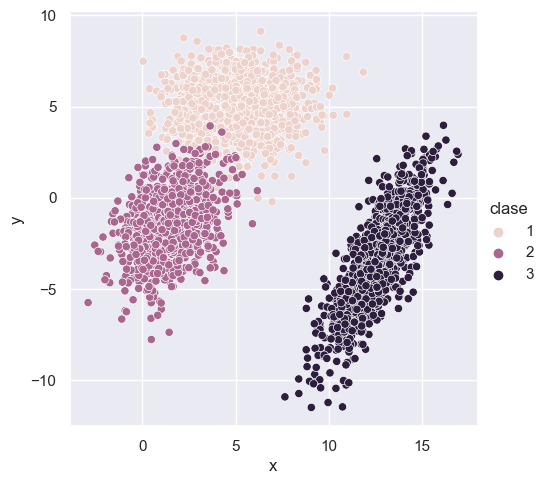

In [35]:
df = pd.DataFrame([dict(x=x, y=y, clase=1) for x, y in X_1] + \
                  [dict(x=x, y=y, clase=2) for x, y in X_2] + \
                  [dict(x=x, y=y, clase=3) for x, y in X_3])
sns.relplot(data=df, kind='scatter',
            x='x', y='y', hue='clase')

sns.savefig('grupos.jpg')

In [13]:
X = np.concatenate((X_1, X_2, X_3))
posterior = (np.vstack([p1.pdf(X),
                        p2.pdf(X), 
                        p3.pdf(X)]) * 1 / 3).T


In [15]:
#La evidencia es un factor normalizador que hace que las probabilidad sume a uno, el siguiente código calcula la evidencia, P(X)

evidencia = posterior.sum(axis=1)

evidencia

array([0.00909794, 0.01585003, 0.01158646, ..., 0.00292462, 0.02258399,
       0.01493972])

In [17]:
# Finalmente, P(Y∣X) se obtiene normalizando P(X∣Y)P(Y) que se puede realizar de la siguiente manera.

posterior = posterior / np.atleast_2d(evidencia).T

posterior

array([[1.09900314e+02, 1.47245487e-02, 6.77055758e-23],
       [6.30740805e+01, 1.73021940e-02, 6.55561087e-31],
       [8.49887250e+01, 1.31891005e+00, 3.72423234e-37],
       ...,
       [4.36225234e-05, 4.77816901e-20, 3.41924227e+02],
       [5.11200947e-09, 2.23971257e-17, 4.42791479e+01],
       [1.46959446e-12, 5.73446710e-19, 6.69356642e+01]])

In [18]:
# La clase corresponde a la probabilidad máxima, en este caso se compara la probabilidad de P(y=1∣X), P(Y=2∣X) y P(Y=3∣X); 
# y la clase es aquella que tenga mayor probabilidad. El siguiente código muestra este procedimiento, donde el primer paso es
# crear un arreglo para mapear el índice a la clase. El segundo paso es seleccionar la probabilidad máxima y después transformar 
# el índice de la probabilidad máxima a la clase.

clase = np.array([1, 2, 3])
indice = posterior.argmax(axis=1)
prediccion = clase[indice]

In [23]:
prediccion = clase[indice]
prediccion

array([1, 1, 1, ..., 3, 3, 3])

In [24]:
# En la variable prediccion se tienen las predicciones de las clases, ahora se analizará si estas predicciones corresponden con la clase original 
# que fue generada. Por la forma en que se generó X se sabe que los primero 1000 elementos pertenecen a la clase 1, los siguientes 1000 a la clase 
# 2 y los restantes a la clase 3. A continuación se muestra el arreglo y que tiene esta estructura.

y = np.concatenate([np.ones(1000), np.ones(1000) + 1, np.ones(1000) + 2])



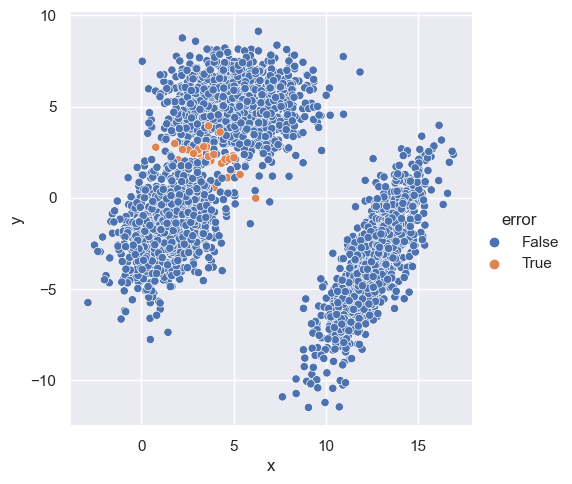

In [26]:
_ = [dict(x=x, y=y, error=error) 
     for (x, y), error in zip(X, y != prediccion)]
df_error = pd.DataFrame(_)
sns.relplot(data=df_error, kind='scatter',
            x='x', y='y', hue='error')

In [27]:
error = (y != prediccion).mean()

error

0.011666666666666667

In [28]:
se_formula = np.sqrt(error * (1 - error) / 3000)
se_formula

0.0019604893569000878

In [29]:
S = np.random.randint(y.shape[0], size=(500, y.shape[0]))
B = [(y[s] != prediccion[s]).mean() for s in S]
se = np.std(B)

In [30]:
S

array([[ 283, 2723, 1063, ..., 1767,  739, 1149],
       [2896, 1115, 2080, ..., 1913, 1531,  744],
       [1128, 2740, 2305, ..., 2814,  307, 1943],
       ...,
       [1853, 2376, 2030, ..., 1102,  780,  726],
       [ 294,   96, 1848, ..., 2077, 2837, 2744],
       [ 966, 2831, 1630, ...,  640, 2363,  686]])

In [32]:
se

0.00194363188101268

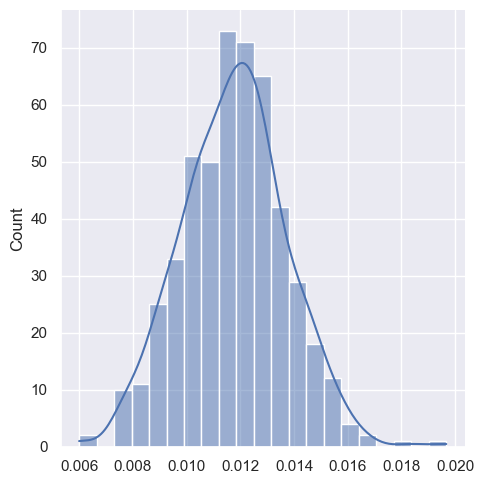

In [33]:
sns.displot(B, kde=True)

